# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
%matplotlib widget

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
#mouse_study_data = pd.concat([mouse_metadata,study_results])
mouse_study_data = pd.merge(mouse_metadata,study_results, on="Mouse ID", how="right")

# Display the data table for preview
mouse_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [6]:
# Checking the number of mice.
num_mice = len(mouse_study_data['Mouse ID'].unique())
print(num_mice)             #249
num_mice2 = mouse_study_data['Mouse ID'].nunique()
print(num_mice2)            #249

249
249


In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mice_duplicate = mouse_study_data[mouse_study_data.duplicated(["Mouse ID", "Timepoint"])]
mice_duplicate_unique = mice_duplicate["Mouse ID"].unique()
mice_duplicate_unique            #array(['g989'], dtype=object)

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID.
'''
for x in mouse_study_data["Mouse ID"] == "g989":
    if x == True:
        print(x)
print("**************************************")
'''
mice_duplicate_alldata = mouse_study_data[mouse_study_data["Mouse ID"] == "g989"]
mice_duplicate_alldata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_dataframe = mouse_study_data[mouse_study_data["Mouse ID"] != "g989"]
clean_mouse_dataframe.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [10]:
# Checking the number of mice in the clean DataFrame.
#Method 1
print(len(clean_mouse_dataframe['Mouse ID'].unique()))

#Method 2
number_clean_mouse_dataframe = clean_mouse_dataframe['Mouse ID'].unique()
print(len(number_clean_mouse_dataframe))

248
248


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#clean_mouse_dataframe.describe()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
grouped_by_drug_regimen = clean_mouse_dataframe.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumorvolume = grouped_by_drug_regimen["Tumor Volume (mm3)"].mean()
median_tumorvolume = grouped_by_drug_regimen["Tumor Volume (mm3)"].median()
variance_tumorvolume = grouped_by_drug_regimen["Tumor Volume (mm3)"].var()
std_tumorvolume = grouped_by_drug_regimen["Tumor Volume (mm3)"].std()
sem_tumorvolume = grouped_by_drug_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame. 
single_summary_DataFrame = pd.DataFrame({"Mean/Avg Tumor Volume" : mean_tumorvolume,
                                         "Median Tumor Volume" : median_tumorvolume,
                                         "Variance Tumor Volume" : variance_tumorvolume,
                                         "STD Tumor Volume" : std_tumorvolume,
                                         "SEM Tumor Volume" : sem_tumorvolume 
                                        })

#print(single_summary_DataFrame)
#single_summary_DataFrame.describe()
single_summary_DataFrame

,Mean/Avg Tumor Volume,Median Tumor Volume,Variance Tumor Volume,STD Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
single_summary_DataFrame = pd.DataFrame({"mean" : mean_tumorvolume,
                                         "med" : median_tumorvolume,
                                         "var" : variance_tumorvolume,
                                         "std" : std_tumorvolume,
                                         "sem" : sem_tumorvolume 
                                        })

#print(single_summary_DataFrame)
#single_summary_DataFrame.describe()
single_summary_DataFrame

,mean,med,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

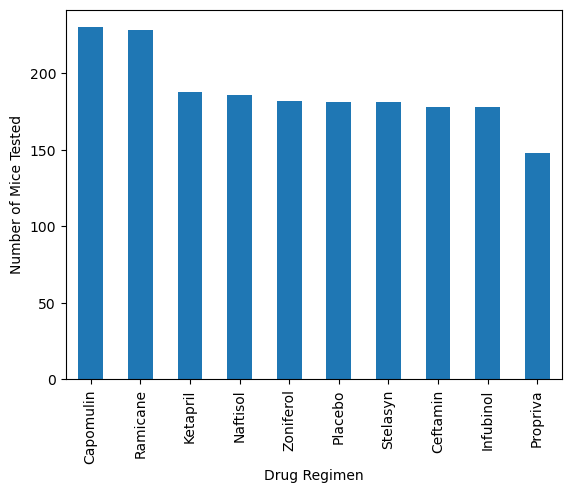

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_number_rows_df = pd.DataFrame(clean_mouse_dataframe.groupby("Drug Regimen").count()["Mouse ID"])
total_number_rows_df = total_number_rows_df.reset_index()
total_number_rows_df = total_number_rows_df.sort_values(by="Mouse ID",ascending = False)
timepoint_pd_plot = total_number_rows_df.plot.bar("Drug Regimen","Mouse ID",legend=False)
timepoint_pd_plot = timepoint_pd_plot.set_ylabel("Number of Mice Tested")


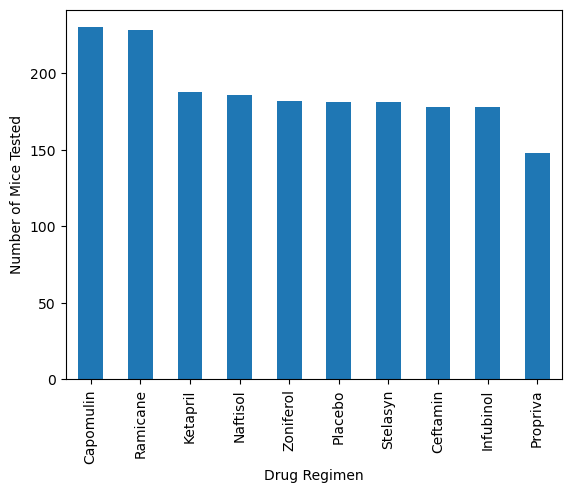

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_number_rows_df = pd.DataFrame(clean_mouse_dataframe.groupby("Drug Regimen").count()["Mouse ID"])
total_number_rows_df = total_number_rows_df.reset_index()
total_number_rows_df = total_number_rows_df.sort_values(by="Mouse ID",ascending = False)
timepoint_pd_plot = total_number_rows_df.plot.bar("Drug Regimen","Mouse ID",legend=False)
timepoint_pd_plot = timepoint_pd_plot.set_ylabel("Number of Mice Tested")

        count
Sex          
Male      958
Female    922


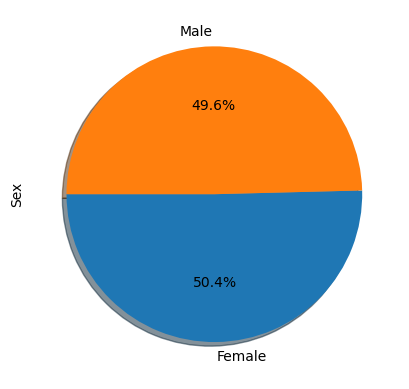

In [19]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender_df = pd.DataFrame(clean_mouse_dataframe['Sex'].value_counts())
unique_mice_gender_df
print(unique_mice_gender_df)
first_timepoint = clean_mouse_dataframe[clean_mouse_dataframe["Timepoint"] == 0].copy()

# Make the pie chart
sex_label = first_timepoint['Sex'].unique()
sex_count = first_timepoint['Sex'].value_counts()
plt.pie(sex_count, labels=sex_label,  autopct='%1.1f%%', shadow=True, startangle=180)
plt.ylabel("Sex")
plt.show()

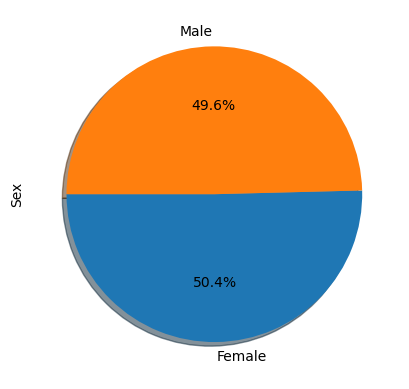

In [20]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart

#sex_plot = plt.figure(figsize=(5,5))
#sex_plot = plt.pie(unique_mice_gender_df["Sex"],labels = ["Male","Female"],autopct='%1.1f%%')
#sex_plot
#sex_plot = plt.ylabel("Sex")
#plt.show()
sex_label = first_timepoint['Sex'].unique()
sex_count = first_timepoint['Sex'].value_counts()
plt.pie(sex_count, labels=sex_label,  autopct='%1.1f%%', shadow=True, startangle=180)
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
maxtimepoint_df = pd.DataFrame(clean_mouse_dataframe.groupby("Mouse ID").max()["Timepoint"])
# Start by getting the last (greatest) timepoint for each mouse
#final_tpt = clean_mouse_dataframe.loc[clean_mouse_dataframe.groupby("Mouse ID")["Timepoint"].idxmax(), ["Mouse ID","Timepoint","Tumor Volume (mm3)", "Drug Regimen", "Weight (g)"]]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
##drug_interest
merged_tpt= pd.merge(clean_mouse_dataframe, maxtimepoint_df, on=("Mouse ID", "Timepoint"), how="right")


tumor_volume = merged_tpt.loc[(merged_tpt["Drug Regimen"] == "Capomulin") |  
                                         (merged_tpt["Drug Regimen"] == "Ramicane") | 
                                         (merged_tpt["Drug Regimen"] == "Infubinol") |
                                        ( merged_tpt["Drug Regimen"] ==  "Ceftamin")]
tumor_volume


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
3,a275,Ceftamin,Female,20,28,45,62.999356,3
6,a411,Ramicane,Male,3,22,45,38.407618,1
7,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,Ceftamin,Female,6,27,45,68.594745,4
239,y793,Capomulin,Male,17,17,45,31.896238,2
240,y865,Ceftamin,Male,23,26,45,64.729837,3
244,z578,Ramicane,Male,11,16,45,30.638696,0


In [48]:
chosen_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = merged_tpt[merged_tpt["Drug Regimen"].isin(chosen_treatments)]
drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
3,a275,Ceftamin,Female,20,28,45,62.999356,3
6,a411,Ramicane,Male,3,22,45,38.407618,1
7,a444,Ramicane,Female,10,25,45,43.047543,0


In [51]:
# Put treatments into a list for for loop (and later for plot labels)
#chosen_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#drugs = merged_tpt[merged_tpt["Drug Regimen"].isin(chosen_treatments)]
# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds
treatment = 0
for drug in chosen_treatments:
    quartiles = merged_tpt[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"="*40)
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"="*40)
    treatment = treatment + 1

KeyError: 'Capomulin'

NameError: name 'capomulin_vol' is not defined

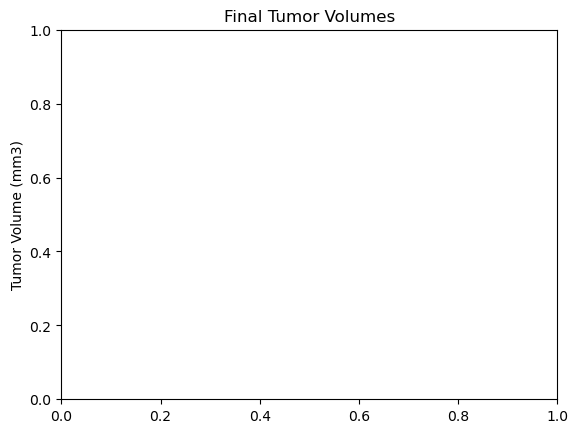

In [40]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1,ax1 = plt.subplots()
ax1.set_title("Final Tumor Volumes")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot([capomulin_vol,ramicane_vol,infubinol_vol,ceftamin_vol])
ax1.set_xticklabels(["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.show()

## Line and Scatter Plots

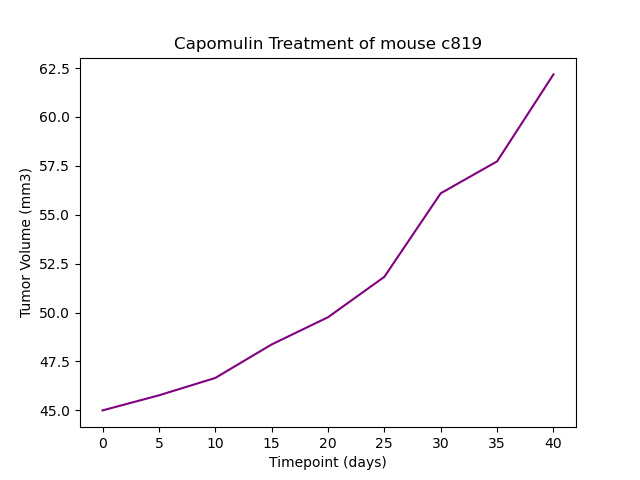

In [167]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
c819_study = clean_mouse_dataframe.loc[clean_mouse_dataframe["Mouse ID"] == "c819",:]
fig2,ax2 = plt.subplots()
ax2.set_title("Capomulin Treatment of mouse c819")
ax2.set_ylabel("Tumor Volume (mm3)")
ax2.set_xlabel("Timepoint (days)")

ax2.plot(c819_study["Timepoint"],c819_study["Tumor Volume (mm3)"],color="purple")
plt.show()

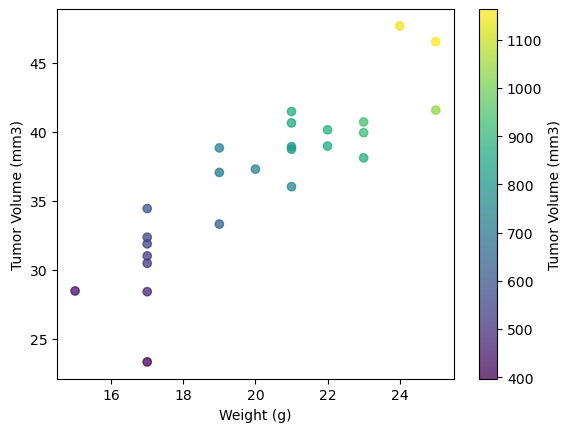

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_copy_data = merged_tpt.loc[merged_tpt["Drug Regimen"] == "Capomulin"].copy()
capomulin_copy_data["Color Value"] = capomulin_copy_data["Tumor Volume (mm3)"] * capomulin_copy_data["Weight (g)"]

plt.scatter(capomulin_copy_data["Weight (g)"], capomulin_copy_data["Tumor Volume (mm3)"], marker="o", alpha=0.75, c=capomulin_copy_data["Color Value"])
color_bar = plt.colorbar()
color_bar.set_label("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.88.


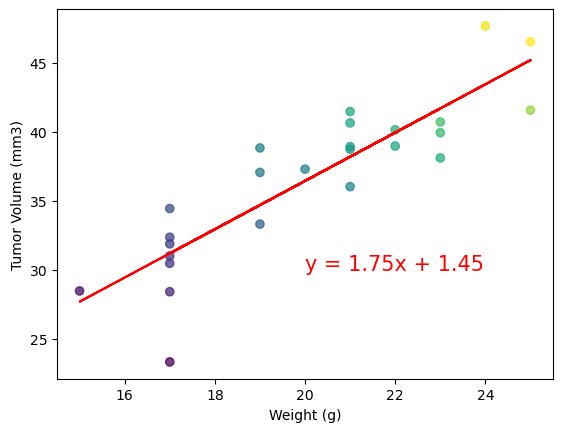

In [30]:
# Calculate the correlation coefficient and a linear regression model
correlation = st.pearsonr(capomulin_copy_data["Weight (g)"], capomulin_copy_data["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_copy_data["Weight (g)"], capomulin_copy_data["Tumor Volume (mm3)"])
regress_values = capomulin_copy_data["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capomulin_copy_data["Weight (g)"], capomulin_copy_data["Tumor Volume (mm3)"], marker="o", alpha=0.75, c=capomulin_copy_data["Color Value"])
plt.plot(capomulin_copy_data["Weight (g)"],regress_values,"r-")
plt.annotate(line_eq,xy=(20,30),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
